### Deliverable 1: Preprocessing the Data for a Neural Network

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv(r"charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [26]:
# Drop EIN and NAME columns.

application_df.drop(['EIN','NAME'],axis=1,inplace=True)

In [27]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [28]:
# Determine number of unique values in each column.

application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [29]:
# Look at APPLICATION_TYPE column for binning.

application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

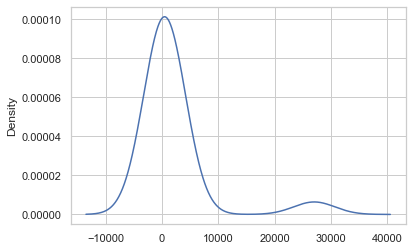

In [30]:
#  Visualize the value counts of APPLICATION_TYPE by using a density plot.
import seaborn as sns
sns.set(style="whitegrid")
application_df['APPLICATION_TYPE'].value_counts().plot(kind='density')

In [31]:
# Determine which values to replace if counts are less than 10.

application_df['APPLICATION_TYPE'].value_counts()
application_df['APPLICATION_TYPE'].value_counts().loc[application_df['APPLICATION_TYPE'].value_counts() < 528].index

# Replace the values 
application_df['APPLICATION_TYPE'].replace(application_df['APPLICATION_TYPE']
                                           .value_counts().loc[application_df['APPLICATION_TYPE'].value_counts() < 528].index, 'OTHER', inplace=True)

application_df['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
OTHER      276
Name: APPLICATION_TYPE, dtype: int64

In [32]:
# Look at Classified column for binning.

application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C6100        1
C2561        1
C2380        1
C1580        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

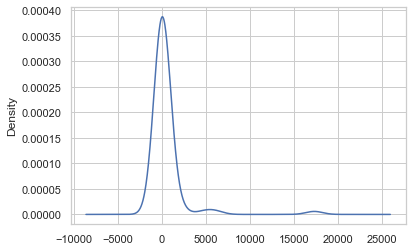

In [33]:
# Visualize the value counts of CLASSIFICATION by using a density plot.

application_df['CLASSIFICATION'].value_counts().plot(kind='density')

In [34]:
# Determine which values to replace if counts are less than 10.

application_df['CLASSIFICATION'].value_counts()
application_df['CLASSIFICATION'].value_counts().loc[application_df['CLASSIFICATION'].value_counts() < 1883].index

application_df['CLASSIFICATION'].replace(application_df['CLASSIFICATION']
                                           .value_counts().loc[application_df['CLASSIFICATION'].value_counts() < 1883].
                                           index, 'OTHER', inplace=True)

application_df['CLASSIFICATION'].value_counts()


C1000    17326
C2000     6074
C1200     4837
OTHER     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [35]:
# Check the number of unique values in each column.

application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [36]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [37]:
# generate a list of categorical values in each column

application_df.select_dtypes(include=['object']).columns
application_df.select_dtypes(include=['object']).apply(lambda x: x.nunique())

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [38]:
# encode categorical values to numeric values using one-hot encoding
encoder = OneHotEncoder(sparse=False)

# using the variable list of categorical values, encode the categorical values to numeric values

encoder_df = pd.DataFrame(encoder.fit_transform(application_df[application_df.select_dtypes(include=['object']).columns]))

In [39]:
col_names = application_df.select_dtypes(include=['object']).columns
encoder_df.columns = encoder.get_feature_names(col_names)
encoder_df

,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
new_df = pd.concat([application_df, encoder_df], axis=1)
new_df.drop(application_df.select_dtypes(include=['object']).columns, axis=1, inplace=True)
new_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# By looking at the data the IS_SUCCESSFUL column is the target variable.

In [42]:
# Split our preprocessed data into our features and target arrays

Target = new_df.IS_SUCCESSFUL.values
Features = new_df.drop(['IS_SUCCESSFUL'],axis=1).values

In [43]:
# Splitiing the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [44]:
# applying standard scaling to the training and testing sets

Scaler = StandardScaler()

X_scaler = Scaler.fit_transform(X_train)

# scale the data

X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [45]:
input_feat = len(X_train_scaled[0])

# Define the model and its layers

First_hidden_layer = 100
Second_hidden_layer = 50

nn = tf.keras.models.Sequential()

# Adding the hidden layers

nn.add(tf.keras.layers.Dense(units=First_hidden_layer,input_dim=input_feat,activation='relu'))
nn.add(tf.keras.layers.Dense(units=Second_hidden_layer,activation='relu'))

# output layer

nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# check the model

nn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               4400      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 9,501
Trainable params: 9,501
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile the model
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
# Train the model
nn.fit(X_train_scaled,y_train,validation_split=0.2,epochs=20,batch_size=10)

Epoch 1/20
2196/2196 [==============================] - 8s 3ms/step - loss: 0.5727 - accuracy: 0.7208 - val_loss: 0.5565 - val_accuracy: 0.7294
Epoch 2/20
2196/2196 [==============================] - 6s 3ms/step - loss: 0.5588 - accuracy: 0.7283 - val_loss: 0.5496 - val_accuracy: 0.7403
Epoch 3/20
2196/2196 [==============================] - 5s 2ms/step - loss: 0.5555 - accuracy: 0.7271 - val_loss: 0.5525 - val_accuracy: 0.7334
Epoch 4/20
2196/2196 [==============================] - 6s 3ms/step - loss: 0.5529 - accuracy: 0.7283 - val_loss: 0.5459 - val_accuracy: 0.7382
Epoch 5/20
2196/2196 [==============================] - 6s 3ms/step - loss: 0.5507 - accuracy: 0.7307 - val_loss: 0.5462 - val_accuracy: 0.7394
Epoch 6/20
2196/2196 [==============================] - 6s 3ms/step - loss: 0.5502 - accuracy: 0.7305 - val_loss: 0.5446 - val_accuracy: 0.7374
Epoch 7/20
2196/2196 [==============================] - 5s 2ms/step - loss: 0.5498 - accuracy: 0.7303 - val_loss: 0.5468 - val_accuracy:

In [48]:
# Test the model
loss,accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print('Accuracy: %f' % (accuracy*100))


215/215 - 0s - loss: 0.5589 - accuracy: 0.7277
Accuracy: 72.769678


## Deliverable 3: optimizing the model

In [49]:
# optimize the model in such a way that it will achieve the best possible accuracy

input_feat = len(X_train_scaled[0])
print(input_feat)

# Define the model and its layers

First_hidden_layer = 88
Second_hidden_layer = 98

nn = tf.keras.models.Sequential()

# Adding the hidden layers

nn.add(tf.keras.layers.Dense(units=First_hidden_layer,input_dim=input_feat,activation='sigmoid'))
nn.add(tf.keras.layers.Dense(units=Second_hidden_layer,activation='sigmoid'))
nn.add(tf.keras.layers.Dense(units=100,activation='sigmoid'))
nn.add(tf.keras.layers.Dense(units=200,activation='sigmoid'))
nn.add(tf.keras.layers.BatchNormalization())
nn.add(tf.keras.layers.Dense(units=350,activation='sigmoid'))

# output layer

nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# check the model

nn.summary()


43
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 88)                3872      
_________________________________________________________________
dense_7 (Dense)              (None, 98)                8722      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               9900      
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dense_10 (Dense)             (None, 350)               70350     
_________________________________________________________________
dense_11 (Dense)             (None, 1)             

 ### I have changed the neurons in the network but accuracy is still not crossing 74% also i have added more layers to the network and changed the activation function to sigmoid.

In [50]:
# Compile and train
nn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
nn.fit(X_train_scaled,y_train,validation_split=0.10,epochs=15,batch_size=15)


Epoch 1/15
1647/1647 [==============================] - 9s 4ms/step - loss: 0.5967 - accuracy: 0.7068 - val_loss: 0.5862 - val_accuracy: 0.7132
Epoch 2/15
1647/1647 [==============================] - 7s 4ms/step - loss: 0.5837 - accuracy: 0.7149 - val_loss: 1.4981 - val_accuracy: 0.4719
Epoch 3/15
1647/1647 [==============================] - 7s 4ms/step - loss: 0.5774 - accuracy: 0.7159 - val_loss: 0.6656 - val_accuracy: 0.5867
Epoch 4/15
1647/1647 [==============================] - 7s 4ms/step - loss: 0.5736 - accuracy: 0.7176 - val_loss: 0.7971 - val_accuracy: 0.5700
Epoch 5/15
1647/1647 [==============================] - 7s 4ms/step - loss: 0.5736 - accuracy: 0.7167 - val_loss: 0.5690 - val_accuracy: 0.7343
Epoch 6/15
1647/1647 [==============================] - 7s 4ms/step - loss: 0.5697 - accuracy: 0.7195 - val_loss: 0.6447 - val_accuracy: 0.6133
Epoch 7/15
1647/1647 [==============================] - 7s 4ms/step - loss: 0.5682 - accuracy: 0.7215 - val_loss: 0.5813 - val_accuracy:

In [56]:
# created a callback to save the model weights after 5 epochs
nn.fit(X_train_scaled,y_train,validation_split=0.10,epochs=5,batch_size=5,callbacks=[tf.keras.callbacks.ModelCheckpoint('model_weights.h5',monitor='val_loss',save_best_only=True)])

Epoch 1/5
4939/4939 [==============================] - 21s 4ms/step - loss: 0.5615 - accuracy: 0.7208 - val_loss: 0.5503 - val_accuracy: 0.7376
Epoch 2/5
4939/4939 [==============================] - 21s 4ms/step - loss: 0.5629 - accuracy: 0.7197 - val_loss: 0.5531 - val_accuracy: 0.7362
Epoch 3/5
4939/4939 [==============================] - 21s 4ms/step - loss: 0.5588 - accuracy: 0.7247 - val_loss: 1.2761 - val_accuracy: 0.4719
Epoch 4/5
4939/4939 [==============================] - 21s 4ms/step - loss: 0.5586 - accuracy: 0.7267 - val_loss: 0.9479 - val_accuracy: 0.5361
Epoch 5/5
4939/4939 [==============================] - 21s 4ms/step - loss: 0.5553 - accuracy: 0.7283 - val_loss: 0.5458 - val_accuracy: 0.7413


###  Saving the Model

In [51]:
nn.save('AlphabetSoupCharity.h5')